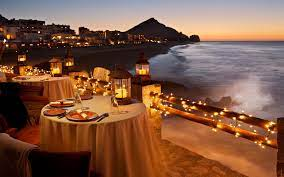

**Bangalore(officially known as Bengaluru) is the capital and largest city of the Indian state of Karnataka.**

With a population of over 15 million, Bangalore is the third largest city in India and 27th largest city in the world.
Bangalore is one of the most ethnically diverse cities in the country, with over 51% of the city’s population being migrants from other parts of India.

Bangalore is sometimes referred to as the “Silicon Valley of India”(or “IT capital of India”) because of its role as the nation’s leading information technology(IT) exporter.

Bangalore has a unique food culture. Restaurants from all over the world can be found here in Bengaluru, with various kind of cuisines.

Some might even say that Bangalore is the best place for foodies.
The food industry is always at a rise in Bangalore, with 12,000 plus restaurants currently active in the city, the number is still increasing.
The growing number of restaurants and dishes in Bangalore is what attracts me to inspect the data to get some insights, some interesting facts and figures.

**Data Description**
* url : This feature contains the url of the restaurant on the Zomato website
* address : This feature contains the address of the restaurant in Bangalore
* name : This feature contains the name of the restaurant
* online_order : whether online ordering is available in the restaurant or not
* book_table : table book option available or not
* rate : contains the overall rating of the restaurant out of 5
* votes : contains total number of upvotes for the restaurant
* phone : contains the phone number of the restaurant
* location : contains the neighborhood in which the restaurant is located
* rest_type : restaurant type
* dish_liked : dishes people liked in the restaurant
* cuisines : food styles, separated by comma
* approx_cost(for two people) : contains the approximate cost of meal for two people
* reviews_list : list of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by the customer
* menu_item : contains list of menus available in the restaurant
* listed_in(type) : type of meal
* listed_in(city) : contains the neighborhood in which the restaurant is located


# Working on the dataset

In [ ]:
#importing the libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load the dataset
zomato_df = pd.read_csv('/kaggle/input/zomato-bangalore-restaurants/zomato.csv')
zomato_df.head()

In [ ]:
zomato_df.shape

In [ ]:
zomato_df.info()  #information about the dataset

In [ ]:
zomato_df.describe()

In [ ]:
zomato_df.columns


In [ ]:
# dropping the unnecessary columns
zomato_df.drop(['url','phone','dish_liked'],axis=1,inplace=True)

In [ ]:
#checking duplicate value
zomato_df.duplicated().sum()

In [ ]:
# dropping the duplicates value from the dataset
zomato_df.drop_duplicates(inplace=True)

In [ ]:
#missing values
zomato_df.isnull().sum()

In [ ]:
import missingno as msno
msno.bar(zomato_df)
plt.show()

In [ ]:
zomato_df.info()

In [ ]:
# dropping the null value from the dataset
zomato_df.dropna(how='any',inplace=True)

In [ ]:
zomato_df.info()

In [ ]:
zomato_df.columns

In [ ]:
#renaming the columns
zomato_df=zomato_df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})

zomato_df.columns

In [ ]:
zomato_df.dtypes

In [ ]:
zomato_df['cost'].unique()

In [ ]:
#Some transformations
zomato_df['cost']=zomato_df['cost'].astype(str)
zomato_df['cost'] = zomato_df['cost'].apply(lambda x: x.replace(',','.')) #Using lambda function to replace ',' from cost
zomato_df['cost'] = zomato_df['cost'].astype(float)

In [ ]:
zomato_df.info()

In [ ]:
zomato_df['rate'].unique()

In [ ]:
#Removing '/5' from Rates
zomato_df = zomato_df.loc[zomato_df.rate !='NEW']
zomato_df = zomato_df.loc[zomato_df.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato_df.rate = zomato_df.rate.apply(remove_slash).str.strip().astype('float')
zomato_df['rate'].head() # looking at the dataset after transforma

In [ ]:
# Adjust the column names
zomato_df.name = zomato_df.name.apply(lambda x:x.title())
zomato_df.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato_df.book_table.replace(('Yes','No'),(True, False),inplace=True)
zomato_df.head() # looking at the dataset after transformation

In [ ]:
#Encode the input Variables
def Encode(zomato_df):
    for column in zomato_df.columns[~zomato_df.columns.isin(['rate', 'cost', 'votes'])]:
        zomato_df[column] = zomato_df[column].factorize()[0]
    return zomato_df

zomato_en = Encode(zomato_df.copy())
zomato_en.head()

In [ ]:
#Get Correlation between different variables
corr = zomato_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
zomato_en.columns

# Exploratory Data Analysis

**Restaurants delivering Online or not**

In [ ]:
sns.countplot(zomato_df['online_order'])
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or not')

**Pieplot**

In [ ]:
labels = ["Accepted",'Not Accepted']
values = zomato_df['online_order'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['pink', 'skyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.title('Online order')
plt.show()

**Restaurants allowing table booking or not**

In [ ]:
sns.countplot(zomato_df['book_table'])
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants allowing table booking or not')

**Table booking Rate vs Normal Rate**

In [ ]:
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(zomato_df['rate'], zomato_df['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('table booking vs Normal rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

**Location**

In [ ]:
sns.countplot(zomato_df['city'])
sns.countplot(zomato_df['city']).set_xticklabels(sns.countplot(zomato_df['city']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Location wise count for restaurants')

**Gaussian Rest type and Rating**

In [ ]:
loc_plt=pd.crosstab(zomato_df['rate'],zomato_df['rest_type'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Rest type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Rest type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

**Types of Services**

In [ ]:
sns.countplot(zomato_df['type'])
sns.countplot(zomato_df['type']).set_xticklabels(sns.countplot(zomato_df['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Type of Service')

**Type and Rating**

In [ ]:
type_plt=pd.crosstab(zomato_df['rate'],zomato_df['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

**No. of Restaurants in a Location**

In [ ]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=zomato_df, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('NO. of restaurants in a Location',size = 20,pad=20)

**Restaurant type**

In [ ]:
fig = plt.figure(figsize=(17,5))
rest = sns.countplot(x="rest_type",data=zomato_df, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
rest 
plt.title('Restaurant types',fontsize = 20 ,pad=20)

**Most famous Restaurant chains in Bengaluru**

In [ ]:
plt.figure(figsize=(15,7))
chains=zomato_df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

# MODELS

In [ ]:
x = zomato_en.iloc[:,[2,3,5,6,7,8,9,11]]
y = zomato_en['rate']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()

**1.LinearRegression**

In [ ]:
#Prepare a Linear Regression Model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test) 

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

**2.LASSO REGRESSION**

In [ ]:
from sklearn.linear_model import Lasso, LassoCV
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 10000, normalize = True)
lassocv.fit(x_train, y_train)



In [ ]:

lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(x_train, y_train)

r2_score(y_test,lasso.predict(x_test))

**3.DecisionTreeRegressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor


DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_predict)


**4.RandomForestRegressor**

In [ ]:
#Preparing Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)

r2_score(y_test,y_predict)

**5.ExtraTreesRegressor**

In [ ]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(x_train,y_train)
y_predict=ETree.predict(x_test)


r2_score(y_test,y_predict)

**6.GradientBoostingRegressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

y_predict=gbr.predict(x_test)



r2_score(y_test,y_predict)


**7.XGBRegressor**

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 7, n_estimators = 200)
xgb.fit(x_train, y_train)
y_predict=xgb.predict(x_test)

r2_score(y_test,y_predict)


In [ ]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest','Extra Tree Regressor', 'Gradient Boost', 'XgBoost'],
    'Score' : [reg.score(x_test, y_test), lasso.score(x_test, y_test), DTree.score(x_test, y_test), RForest.score(x_test, y_test), ETree.score(x_test, y_test),
               gbr.score(x_test, y_test), xgb.score(x_test, y_test)]
})


models.sort_values(by = 'Score', ascending = False)